**OVERVIEW**

In this application, used vehicle dataset containing 426880 samples is analyzed to understand the various features and their correlations, model is developed to predict the vehicle price. Three transformed regression model are evaluated - linear regression, Ridge regression(GridSearchCV) and Lasso regression to predict vehicle price. Vehicle recommendation factors in core features like odometer, age, type, manufacturer, condition, drive type to see their cross relationship to understand the factors that make a vehicle more or less expensive.


### Business Understanding


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Load the used car data set
df = pd.read_csv('data/vehicles.csv')

# Display the columns type and shape of the dataset
df.info()
print("\n\nThe size of the dataset is:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
df.describe(include="all")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Count of null values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [5]:
# Drop rows from data set when on features : [year,model,fuel,odometer,transmission] being null 
df.dropna(subset=['year','model','fuel','odometer','transmission'],axis=0,inplace=True)

In [6]:
# Function to identify the percentage of null values in all features
def check_for_null_values(features):
    total = features.isnull().sum().sort_values(ascending=False)
    percent = (features.isnull().sum()/features.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
# compute the percentage of null values in all features
check_for_null_values(features= df)

,Total,Percent
size,294696,71.463630
cylinders,169774,41.170109
condition,163829,39.728449
VIN,155691,37.754988
drive,125390,30.407011
paint_color,124105,30.095399
type,89016,21.586335
manufacturer,16038,3.889207
title_status,6778,1.643662
id,0,0.000000


In [8]:
# Remove ID and VIN as they do not add value to the dataset
updated_features = df[['region', 'price', 'year', 'manufacturer', 'model','condition', 
                       'cylinders','fuel','odometer','title_status', 'transmission','drive', 
                       'size', 'type','paint_color', 'state']]
# Save the updated features 
updated_features.to_csv('data/vehicles_updated_features.csv',index=False)

# load the updated vehicle data set
df = pd.read_csv('data/vehicles_updated_features.csv')

# Display the updated data set shape
print("\n\nThe size of the dataset is:",df.shape)



The size of the dataset is: (412372, 16)


In [9]:
# As the ID field is removed, check for duplicates as there might be duplicate entries with different ID
df.duplicated().value_counts()

False    358431
True      53941
dtype: int64

In [10]:
# Found 53,941 duplicates. Drop the duplicates for clean data set
df.drop_duplicates(inplace=True)
# Display the updated data set shape
print("\n\nThe size of the dataset is:",df.shape)



The size of the dataset is: (358431, 16)


In [11]:
df.isnull().sum()

region               0
price                0
year                 0
manufacturer     13940
model                0
condition       132803
cylinders       144176
fuel                 0
odometer             0
title_status      5438
transmission         0
drive           108051
size            255097
type             75484
paint_color     103469
state                0
dtype: int64

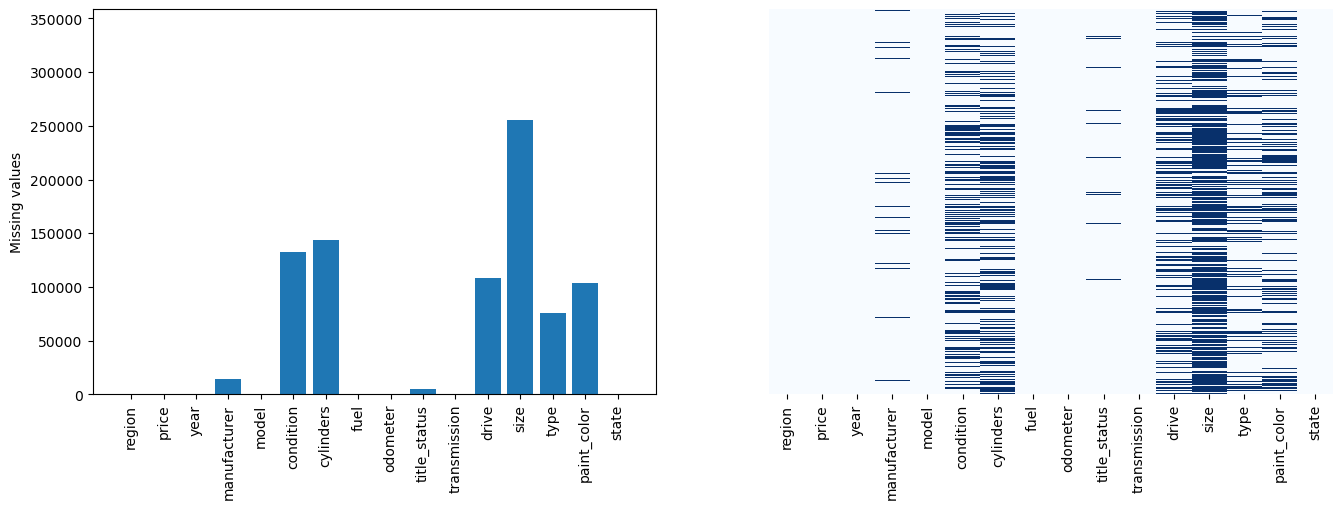

In [12]:
#Plot to visualize features so as to identify missing data 
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)

#heatmap of missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()

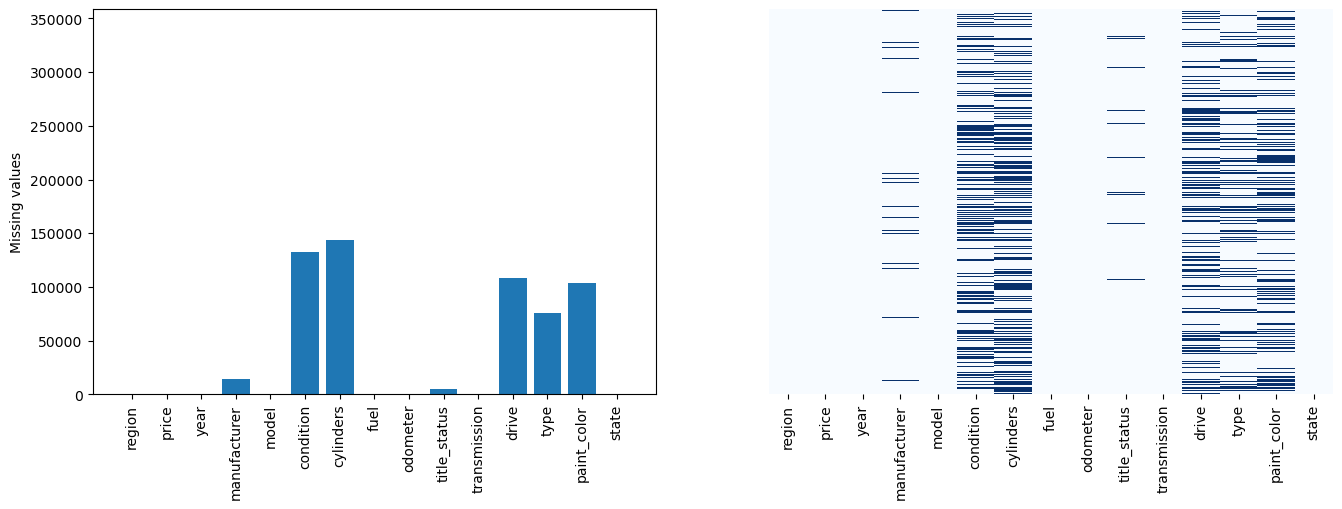

In [13]:
# drop size feature as more than 75% value is missing
df.drop(['size'],axis=1,inplace=True)

#Plot to visualize features so as to identify missing data 
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
#first plot, bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)
#second plot, heatmap of missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()

In [14]:
# drop rows where data is missing
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color'], axis=0, thresh=7, inplace=True)

# Display the updated data set shape
print("\n\nThe size of the dataset is:",df.shape)

# check for null values
df.isnull().sum()



The size of the dataset is: (104403, 15)


region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

<AxesSubplot:xlabel='year', ylabel='Count'>

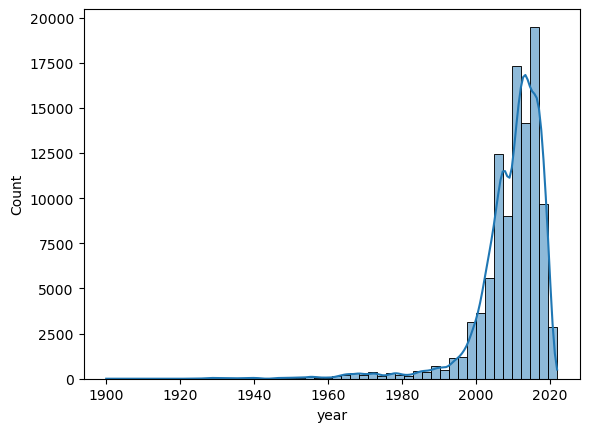

In [15]:
# Plot vehicle manufacture year
sns.histplot(data=df, x=df['year'],bins=50,kde=True)

In [16]:
# Filter vehicles manufactured before year 1980
df = df[df['year']>1980]

# reset index
df = df.reset_index(drop=True)
# Display the updated data set shape
print("\n\nThe size of the dataset is:",df.shape)



The size of the dataset is: (101851, 15)


<AxesSubplot:xlabel='year', ylabel='Count'>

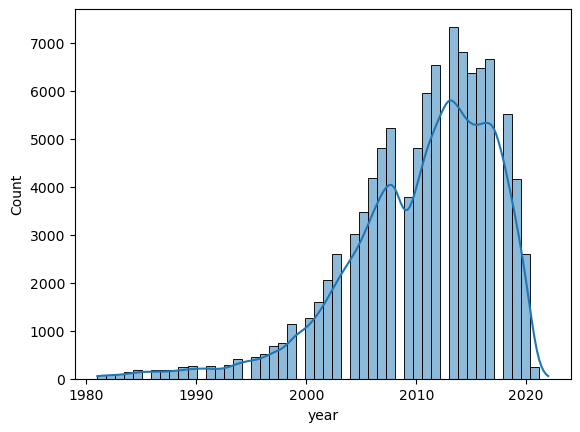

In [17]:
# Visualize the manufactured year spread
sns.histplot(data=df, x=df['year'],bins=50,kde=True)

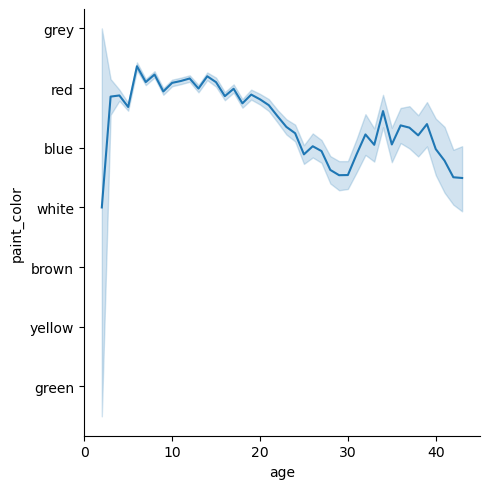

In [18]:
# Check what color of the vehicle is available for every year. 
df['age'] = 2023 - (df['year']-1)
sns.relplot(data=df, x="age", y="paint_color",kind="line")

# White paint vehicles is the most available color


In [19]:
# Replace 'cylinders' from cylinders feature 
df['cylinders'] = df['cylinders'].str.replace('cylinders', '')

# remove 'Other' as it cannot be used effectiviely
df.cylinders.replace("other",np.nan,inplace=True)

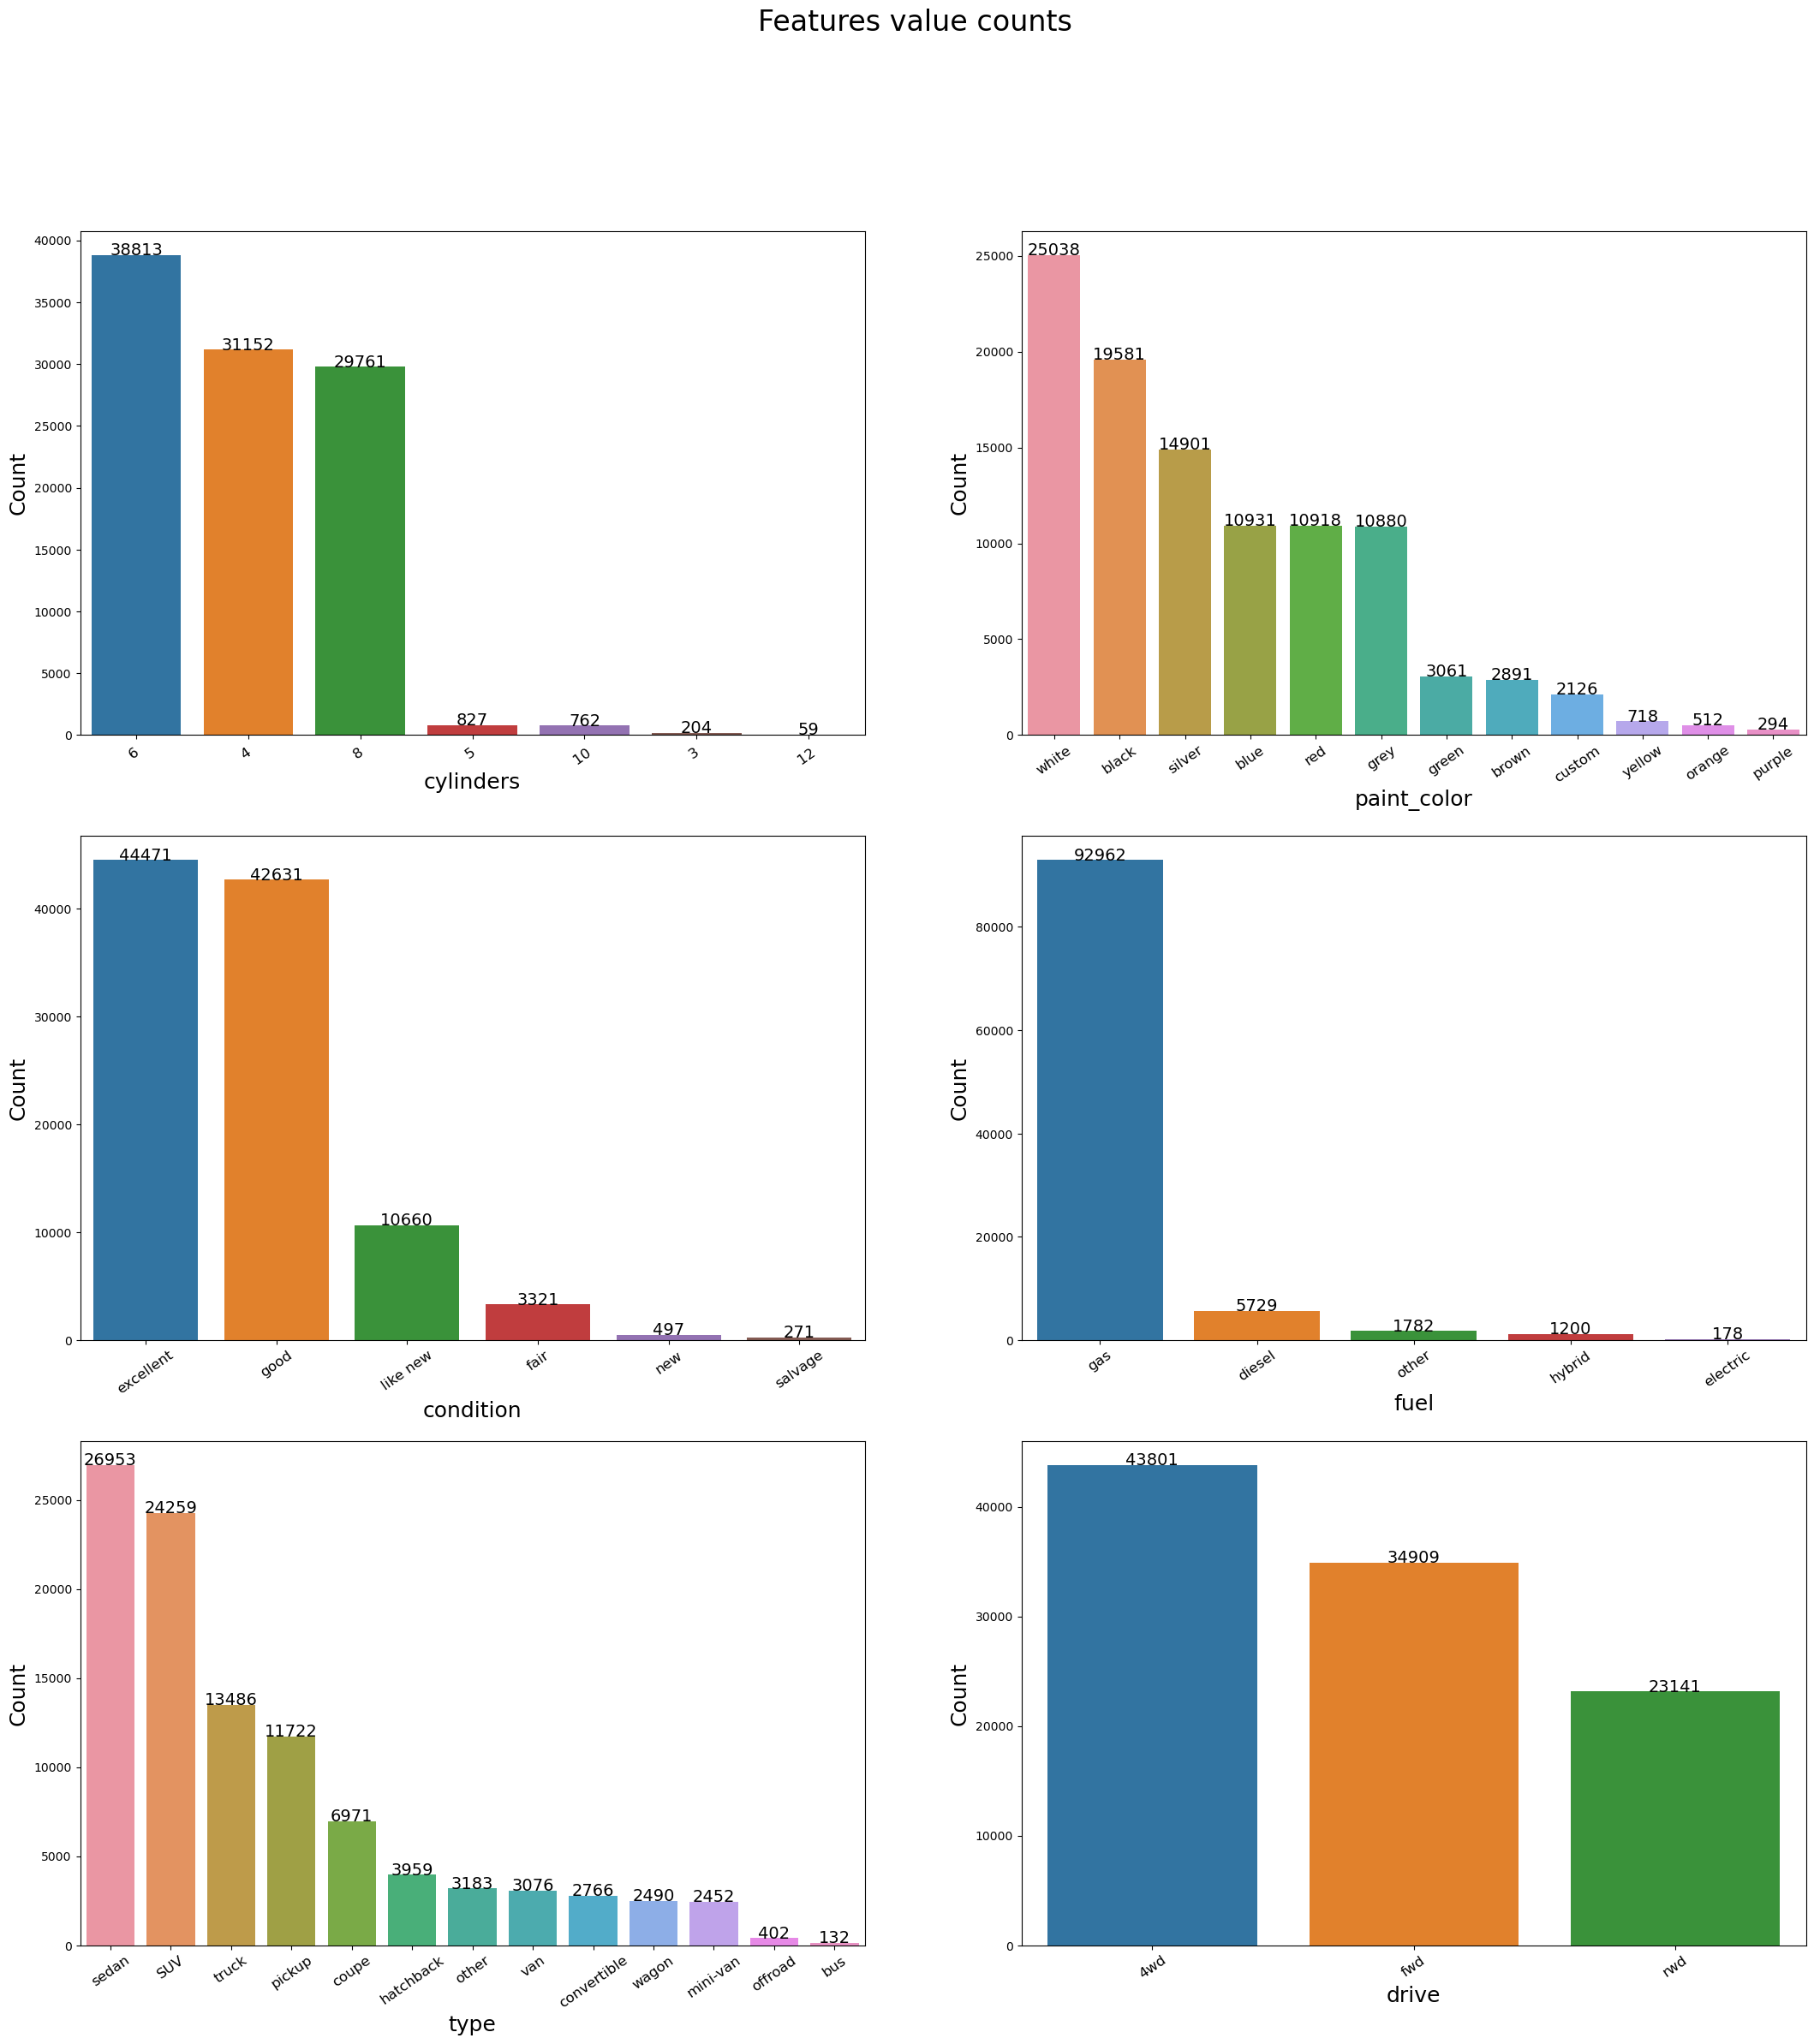

In [20]:
# Visualize core feature count using seaborn countplot
feature_cols = ['cylinders','paint_color','condition','fuel','type','drive']

fig = plt.figure(figsize= (26,26))
plt.suptitle('Features value counts', fontsize = 24)
k=0
for i in range(1,7):
    ax = fig.add_subplot(3,2,i) 
    feature_order = df[feature_cols[k]].value_counts()
    plot = sns.countplot(data = df, x = feature_cols[k], order = feature_order.index, ax= ax) 
    plt.xlabel(feature_cols[k], fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=35, horizontalalignment='center',fontweight='light',fontsize='large')
    
    for j in range(feature_order.shape[0]):
        count = feature_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=14)
    k=k+1

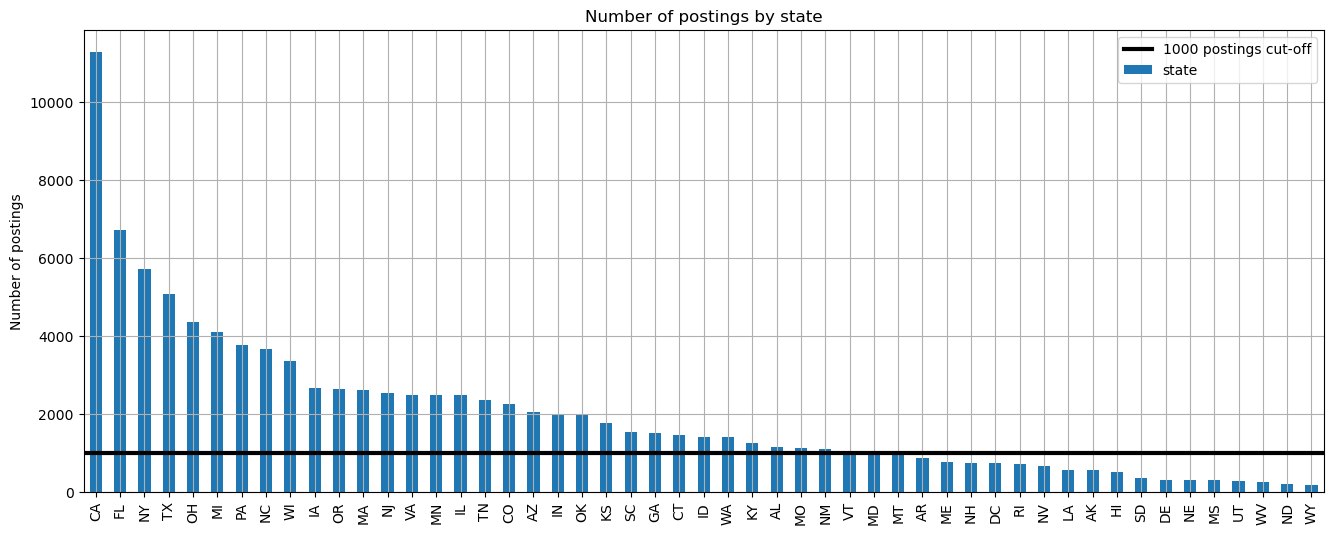

In [21]:
# Visualize what states vehicles are available for sale. Check number of postings per state
fig,ax=plt.subplots(figsize=(16,6))
df.state.str.upper().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by state')

# Identify all states where total vehicle listing is less than 1000
y=[1000,1000]
x=[-1,100]
_=plt.plot(x,y,color='k',label='1000 postings cut-off',linewidth=3)
_=plt.legend()
plt.grid(None)

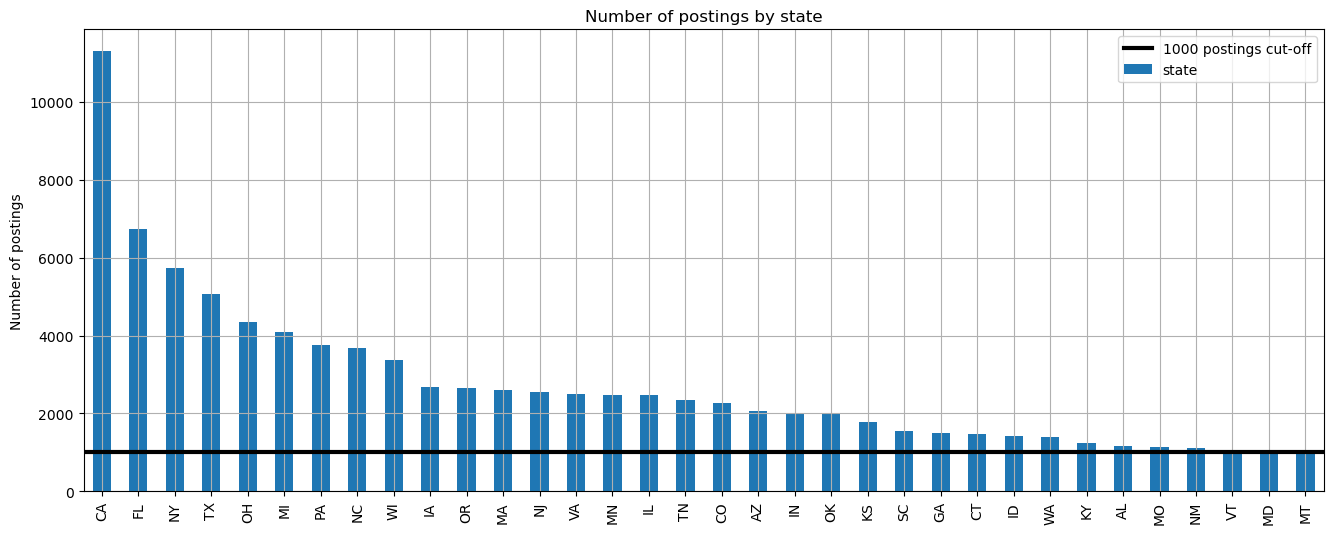

In [22]:
# Remove states where total vehicle listing is less than 1000
df = df.loc[~(df.state.isin(['ar','me','nh','dc','ri','nv','la','ak','hi','sd','ne','de','ms','ut','wv','nd', 'wy']))]

# Visualize the updated data set
fig,ax=plt.subplots(figsize=(16,6))
df.state.str.upper().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by state')
y=[1000,1000]
x=[-1,100]
_=plt.plot(x,y,color='k',label='1000 postings cut-off',linewidth=3)
_=plt.legend()
plt.grid(None)

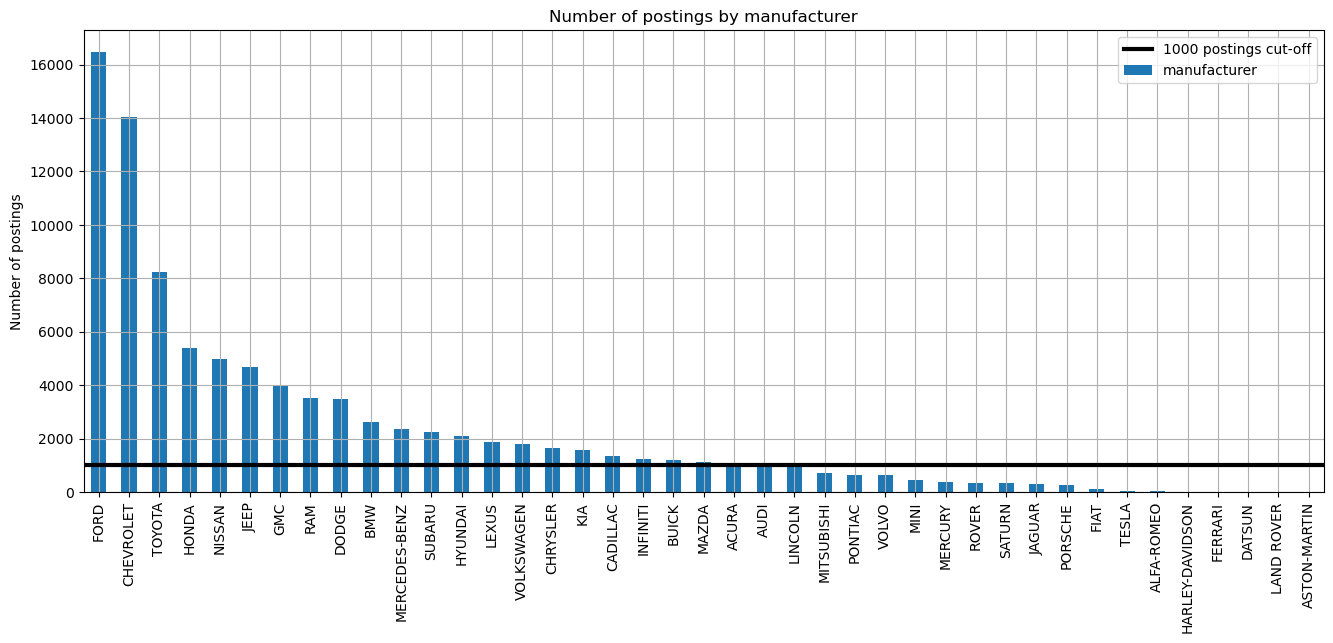

In [23]:
# Remove vehicles where total listing for a manufacturer is less than 1000
fig,ax=plt.subplots(figsize=(16,6))
df.manufacturer.str.upper().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by manufacturer')
y=[1000,1000]
x=[-1,100]
_=plt.plot(x,y,color='k',label='1000 postings cut-off',linewidth=3)
_=plt.legend()
plt.grid(None)

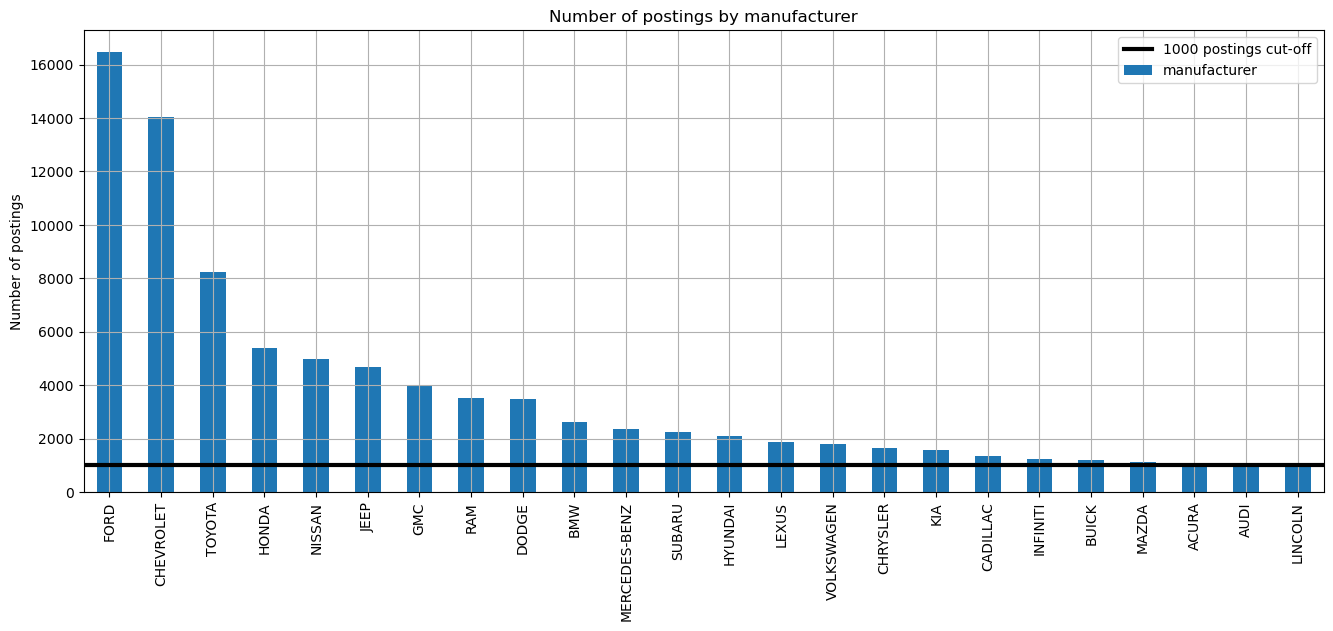

In [24]:
# Remove vehicles where manufacturer count is less than 1000
df = df.loc[~(df.manufacturer.isin(['mitsubishi','pontiac','volvo','mini','mercury','rover','saturn','jaguar','porsche'
                                    ,'fiat','tesla','alfa-romeo','harley-davidson','ferrari','datsun','land rover', 'aston-martin']))]

# Check number of postings per manufacturer
fig,ax=plt.subplots(figsize=(16,6))
df.manufacturer.str.upper().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by manufacturer')
y=[1000,1000]
x=[-1,100]
_=plt.plot(x,y,color='k',label='1000 postings cut-off',linewidth=3)
_=plt.legend()
plt.grid(None)

In [25]:
# Check drive type
df['drive'].value_counts()

4wd    38667
fwd    30208
rwd    20233
Name: drive, dtype: int64

In [26]:
# Check vehicle condition
df['condition'].value_counts()


excellent    38709
good         37810
like new      9169
fair          2778
new            413
salvage        229
Name: condition, dtype: int64

In [27]:
# Check cylinder count
df['cylinders'].value_counts()

6      34342
4      26781
8      26491
10       687
5        461
3        115
12        41
Name: cylinders, dtype: int64

In [28]:
# reset index
df = df.reset_index(drop=True)

# check for duplicates
df.duplicated().value_counts()

False    89057
True        51
dtype: int64

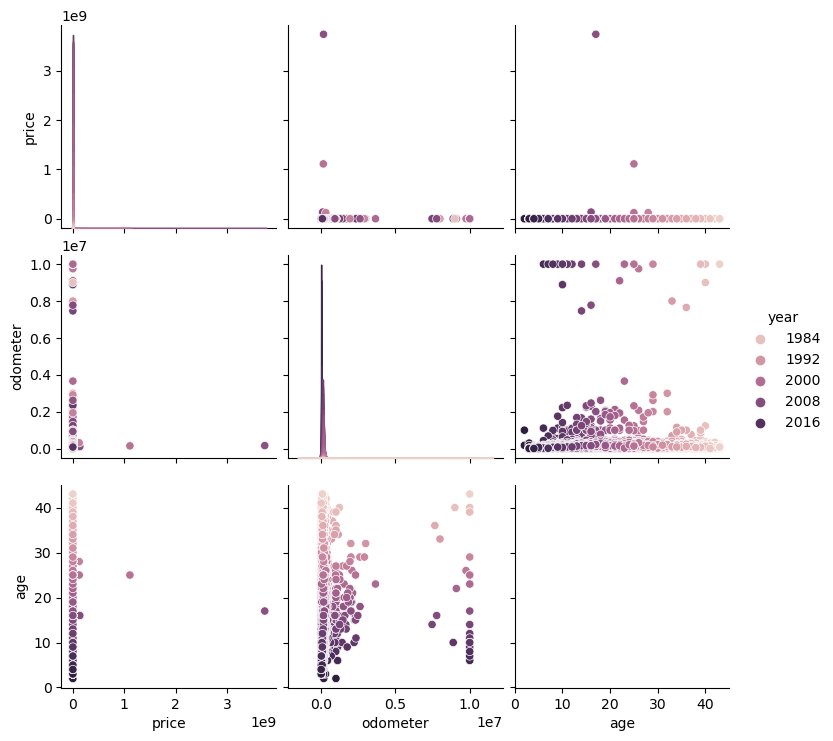

In [29]:
# Pairplot against make of the year
sns.pairplot(data= df, hue= 'year', diag_kind= 'kde')

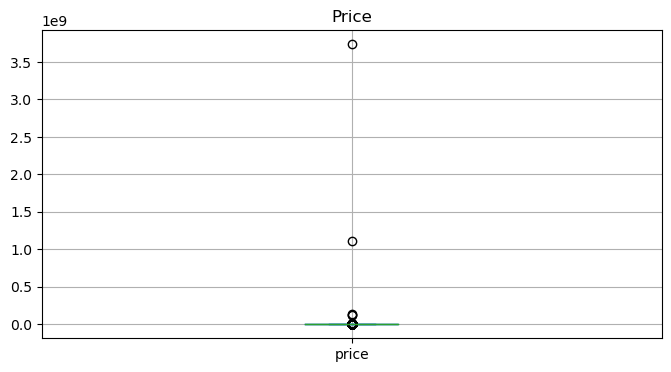

In [30]:
#Boxplots to find vehicle price outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.title('Price')
plt.grid(True)

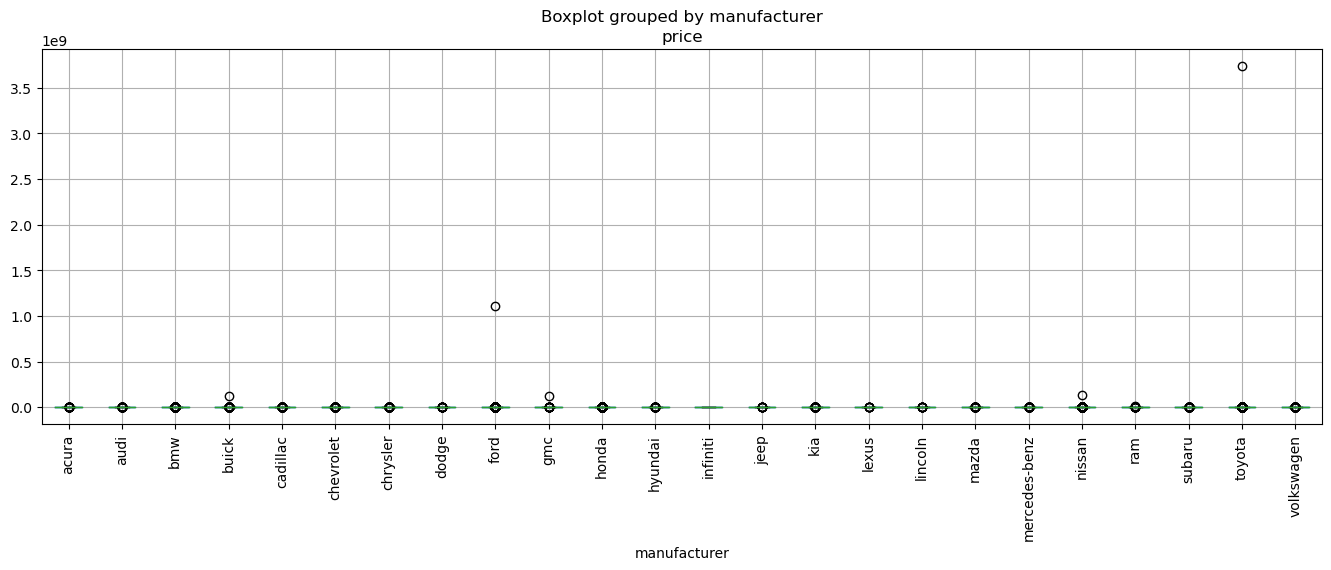

In [31]:
# Boxplot to see which total vehicle price per manufacturer
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','manufacturer',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

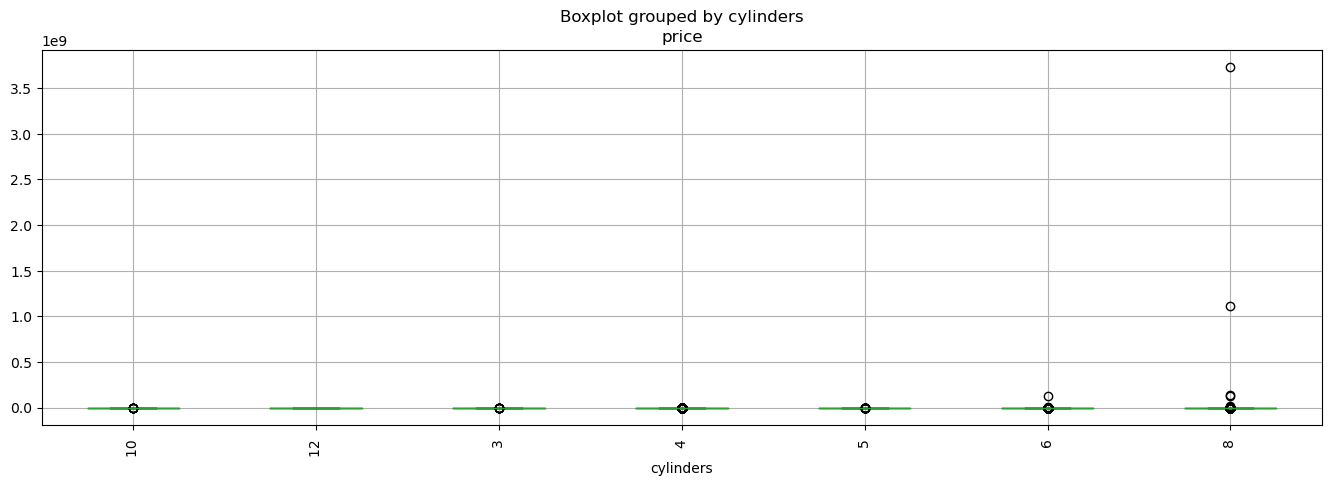

In [32]:
# Boxplot to see vehicle price verses cylinders
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','cylinders',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

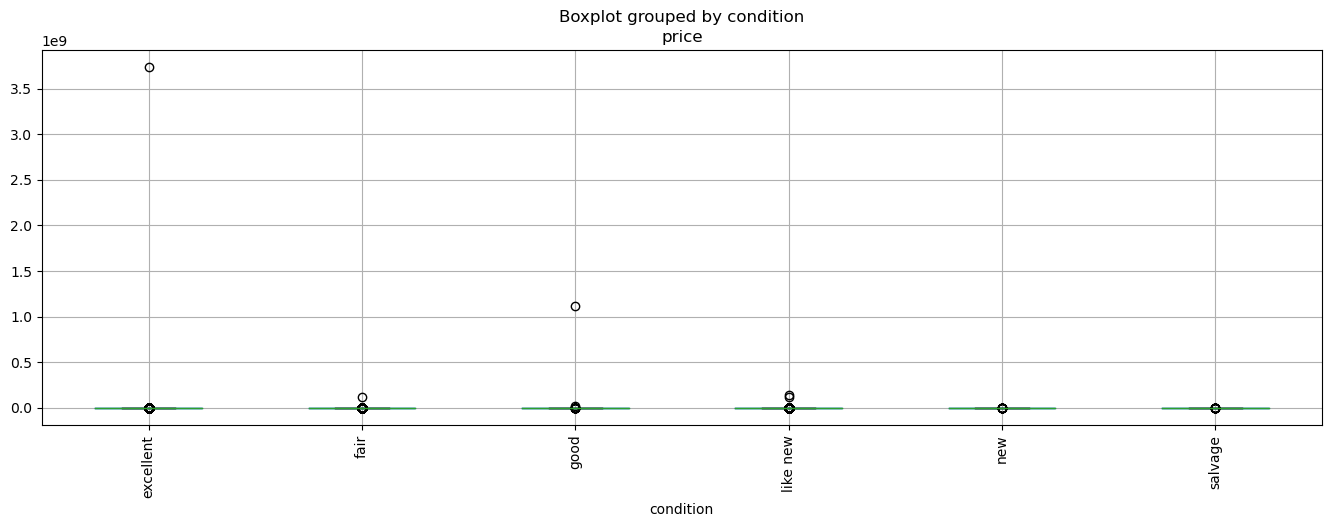

In [33]:
# Boxplot vehicle condition
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','condition',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

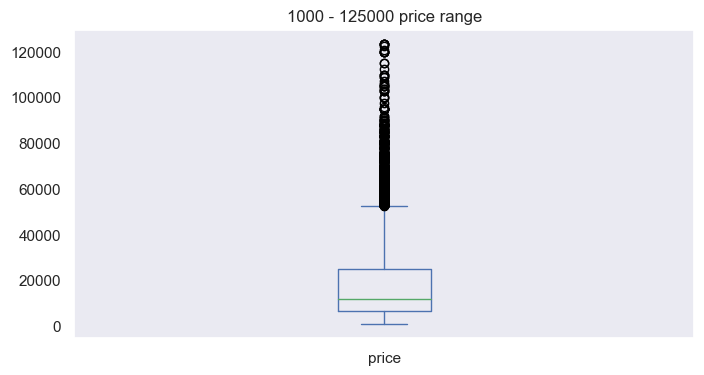

In [34]:
#Outlier -- filter data for price between 1k and 150k
df = df.loc[(df.price >= 1_000) & (df.price <= 125_000)]
sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
ax1.set_title('1000 - 125000 price range')
plt.grid(False)

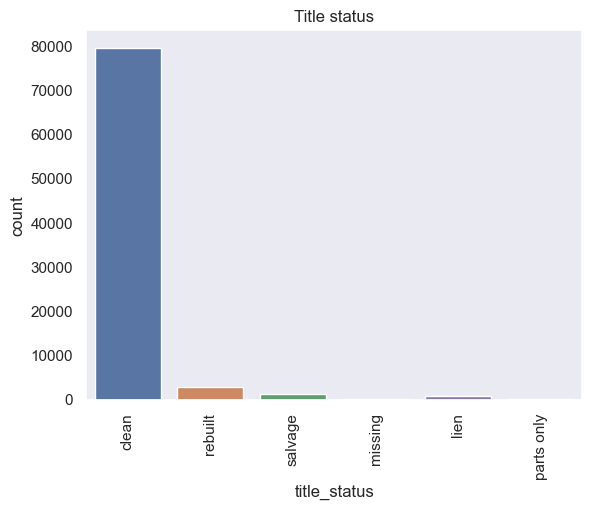

In [35]:
#check vehicle title stutus
sns.countplot(x='title_status',data=df)
plt.title('Title status')
plt.xticks(rotation=90)
plt.grid([])

In [36]:
# Outlier - Remove vehicle title with - ['salvage','lien','missing','parts only']
df = df.loc[~(df.title_status.isin(['salvage','lien','missing','parts only']))]

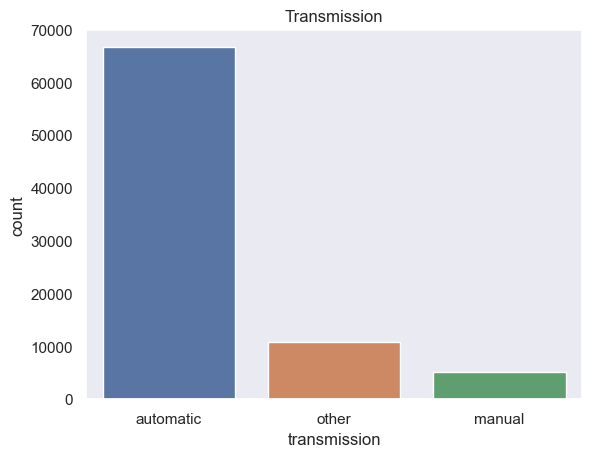

In [37]:
#check the vehicle transmission
sns.countplot(x='transmission',data=df)
plt.title('Transmission')
plt.grid([])

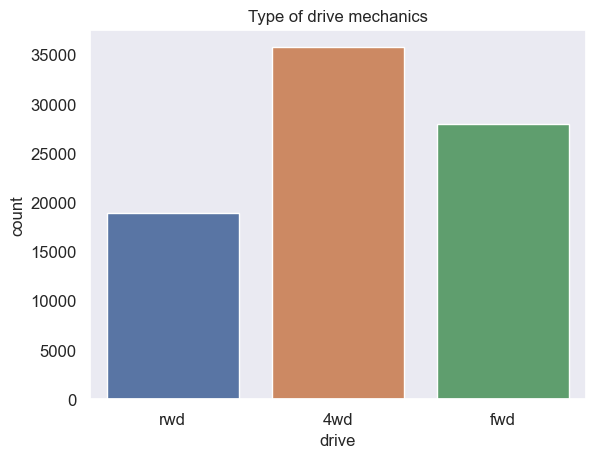

In [38]:
#check the vehicle drive
sns.countplot(x='drive',data=df)
plt.title('Type of drive mechanics')
plt.tick_params(labelsize=12)
plt.grid([])


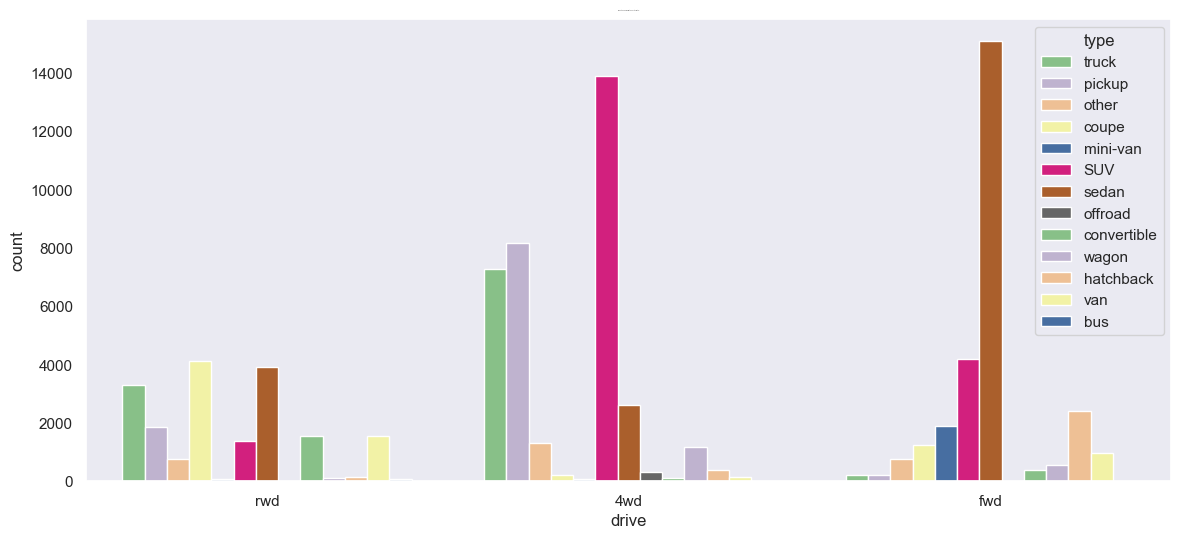

In [39]:
#check drive type and car type distribution
plt.figure(figsize=(14,6))
sns.countplot(x='drive',data=df,hue='type',palette='Accent')
sns.set_context('paper',font_scale=0)
plt.title('Drive type and car type distribution')
plt.grid([])

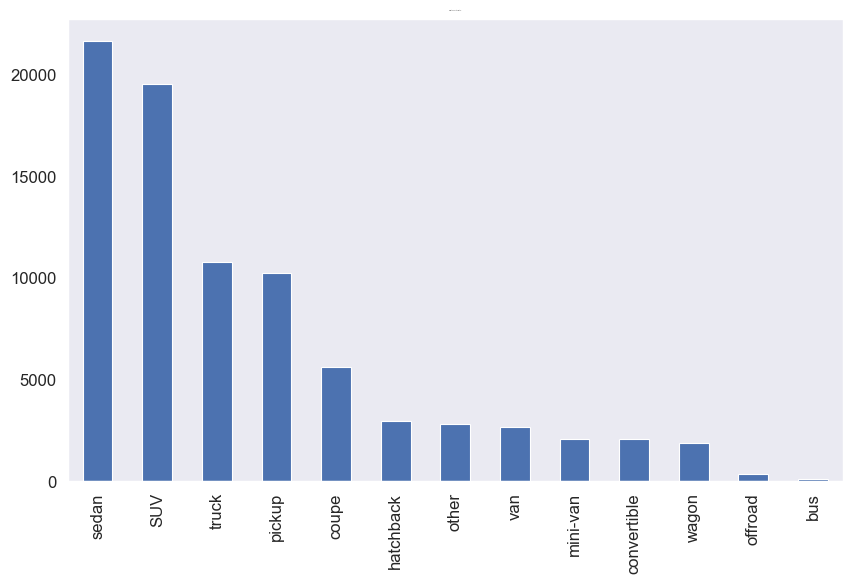

In [40]:
#check the car type distribution
plt.figure(figsize=(10,6))
df.type.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car type distribution')
plt.tick_params(labelsize=12)
plt.grid([])

In [41]:
# Outlier :: Remove vehicle type - ['offroad','bus']
df = df.loc[~(df.type.isin(['offroad','bus']))]

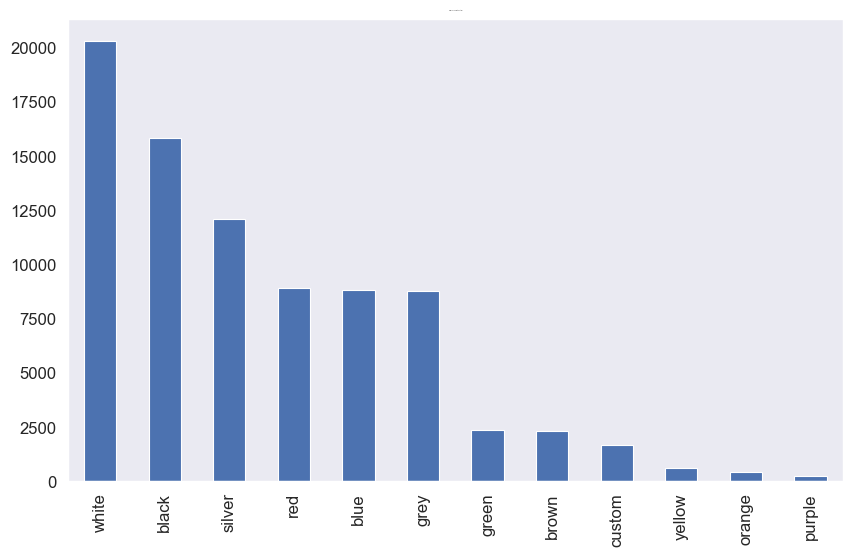

In [42]:
#check the car color distribution
plt.figure(figsize=(10,6))
df.paint_color.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car colors distribution')
plt.tick_params(labelsize=12)
plt.grid([])

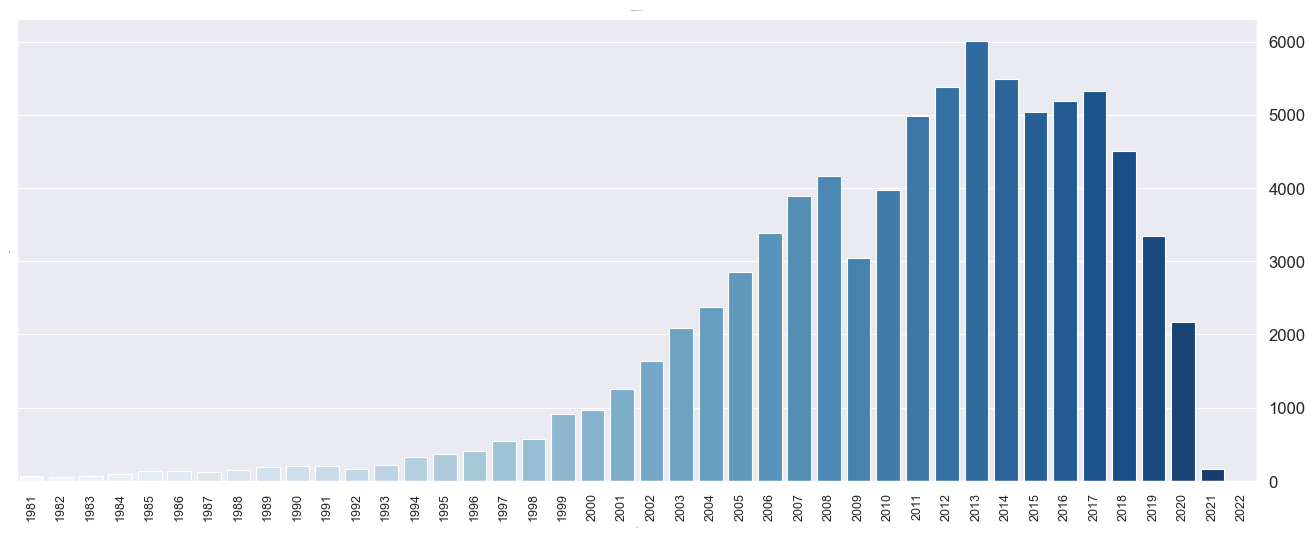

In [43]:
#check the car year distribution

#convert the year column from 'float64' to year type as 'int64'
df['year']=pd.to_datetime(df['year'],errors='ignore',format='%y')
plt.figure(figsize=(16,6))
sns.countplot(x='year',data=df,palette='Blues',dodge=False)
plt.title('Car year distribution')
plt.tick_params(labelsize=12)
plt.xticks(fontsize=9,rotation=90)
plt.tick_params(axis='y', labelleft=False, labelright=True)
plt.show()

In [44]:
#create Age column
df['age'] = 2023 - (df['year']-1)

#take out the 0-3 year old cars
df = df.loc[~(df.Age < 2)]

#Check vehicle age distribution
plt.figure(figsize=(16,6))
sns.set()
sns.countplot(x='age',data=df,palette='Blues_r')
plt.xticks(fontsize=9,rotation=90)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Age'

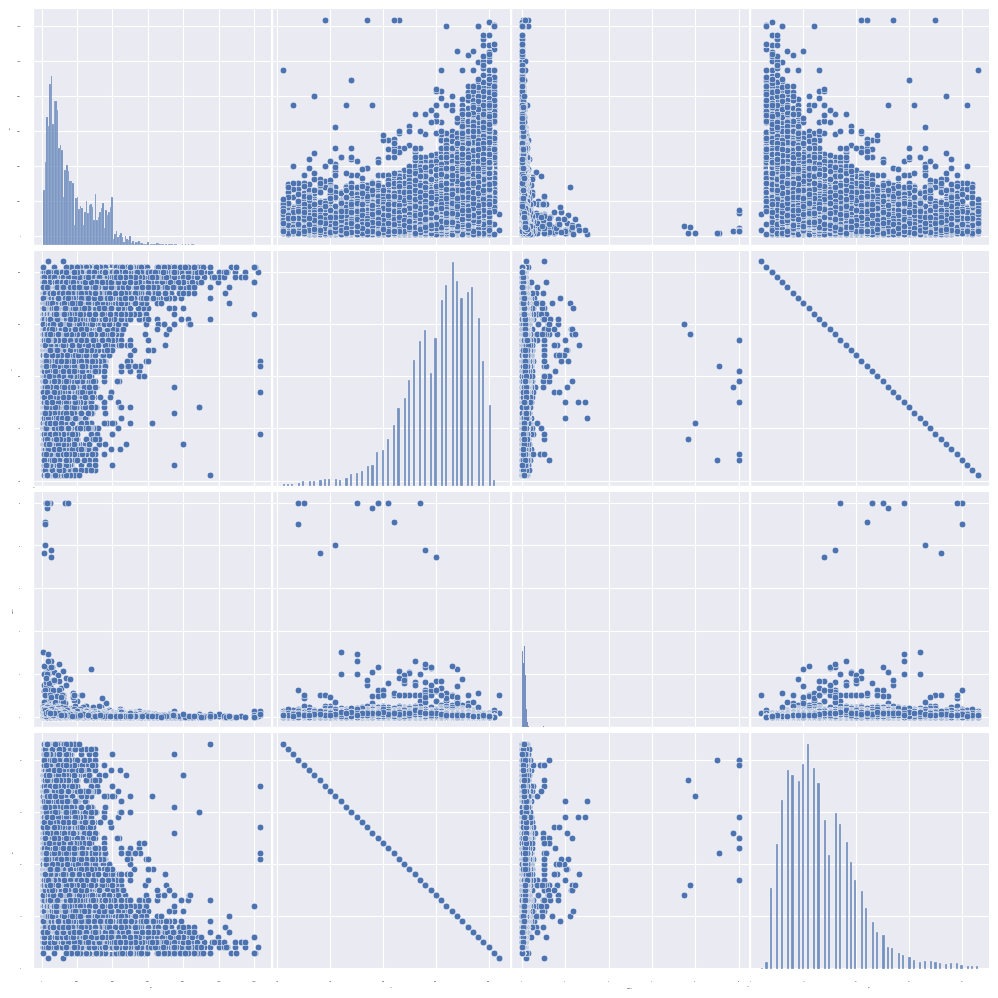

In [45]:
# Plot the data
sns.pairplot(df)

# DATA PREPARATION

In [58]:
# Se the final dataset
final_df = df

# COnvert to numeric data
final_df['year'] = final_df['year'].astype('int64')
final_df['odometer'] = final_df['odometer'].astype('int64')


# Encode non-numeric features
label_encode = preprocessing.LabelEncoder()

# Encode non-numeric features
final_df['region']= label_encode.fit_transform(final_df['region'])
final_df['manufacturer']= label_encode.fit_transform(final_df['manufacturer'])
final_df['model']= label_encode.fit_transform(final_df['model'])
final_df['condition']= label_encode.fit_transform(final_df['condition'])
final_df['fuel']= label_encode.fit_transform(final_df['fuel'])
final_df['title_status']= label_encode.fit_transform(final_df['title_status'])
final_df['transmission']= label_encode.fit_transform(final_df['transmission'])
final_df['drive']= label_encode.fit_transform(final_df['drive'])
final_df['type']= label_encode.fit_transform(final_df['type'])
final_df['paint_color']= label_encode.fit_transform(final_df['paint_color'])
final_df['state']= label_encode.fit_transform(final_df['state'])

final_df['cylinders']= label_encode.fit_transform(final_df['cylinders'])
final_df['age'] = final_df['age'].astype('int64')


#final_df.drop(['no_of_years'], axis=1,inplace=True)

# Swap the first two columns as Price is in the second column
cols = list(final_df.columns)
region, price = cols.index('region'), cols.index('price')
cols[price], cols[region] = cols[region], cols[price]
final_df = final_df[cols]

<AxesSubplot:>

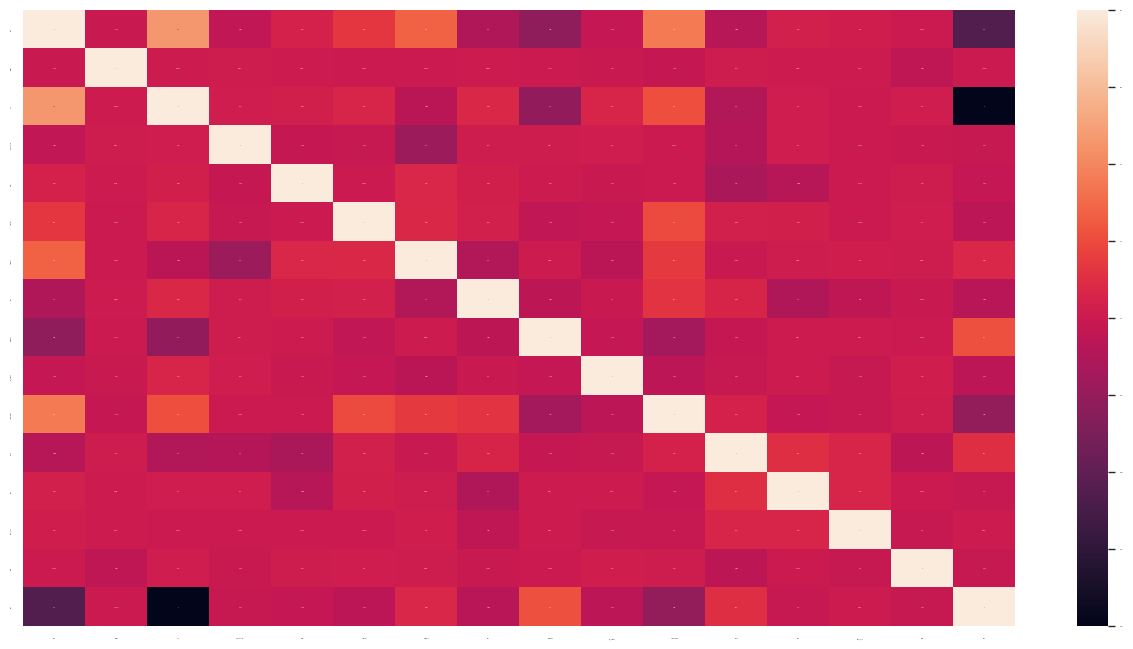

In [59]:
# Plot Correlation matrix after data
plt.figure(figsize=(16,8))
sns.heatmap(data=final_df.corr(),annot=True)

In [60]:
# Feature matrix (independent variables)
X = final_df.iloc[:, 1:]            

# Target variable (dependent variable) = Price
y = final_df.iloc[:, 0]   

# Test , train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82126 entries, 0 to 89107
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         82126 non-null  int64
 1   region        82126 non-null  int64
 2   year          82126 non-null  int64
 3   manufacturer  82126 non-null  int64
 4   model         82126 non-null  int64
 5   condition     82126 non-null  int64
 6   cylinders     82126 non-null  int64
 7   fuel          82126 non-null  int64
 8   odometer      82126 non-null  int64
 9   title_status  82126 non-null  int64
 10  transmission  82126 non-null  int64
 11  drive         82126 non-null  int64
 12  type          82126 non-null  int64
 13  paint_color   82126 non-null  int64
 14  state         82126 non-null  int64
 15  age           82126 non-null  int64
dtypes: int64(16)
memory usage: 12.7 MB


In [62]:
final_df['cylinders'].value_counts()

5    31740
6    24620
3    24548
0      483
4      437
7      175
2       82
1       41
Name: cylinders, dtype: int64

# MODELLING

In [63]:
# Create a LINEAR REGRESSION Model after scaling the data and transforming with Polynomial Feature
linear_regress_pipeline = Pipeline([
                                    ('scale', StandardScaler()),
                                    ('transform', PolynomialFeatures(degree=2)),
                                    ('model', LinearRegression())])

# fit the train data to the LINEAR REGRESSION model
linear_regress_pipeline.fit(X_train, y_train)

# predict the car price using the train data set
regression_pred_train= linear_regress_pipeline.predict(X_train)

# compute RIDGE Model MSE, RMSE for train data set
linear_regression_train_mse = mean_squared_error(y_train, regression_pred_train)
linear_regression_train_rmse = math.sqrt(linear_regression_train_mse)
print('Linear regression Model Train dataset MSE: {}'.format(linear_regression_train_mse))
print('Linear Regression Model Train dataset RMSE: {}'.format(linear_regression_train_rmse))
print('Linear Regression Model Training score: {}\n'.format(linear_regress_pipeline.score(X_train, y_train)))

# predict the car price using the test data set
regression_pred_test= linear_regress_pipeline.predict(X_test)

# compute RIDGE Model MSE, RMSE for train data set
linear_regression_test_mse = mean_squared_error(y_test, regression_pred_test)
linear_regression_test_rmse = math.sqrt(linear_regression_test_mse)
print('Linear regression Model Test dataset MSE: {}'.format(linear_regression_test_mse))
print('Linear Regression Model Test dataset RMSE: {}'.format(linear_regression_test_rmse))
print('Linear Regression Model Test score: {}'.format(linear_regress_pipeline.score(X_test, y_test)))



Linear regression Model Train dataset MSE: 38165849.80460806
Linear Regression Model Train dataset RMSE: 6177.851552490401
Linear Regression Model Training score: 0.7801424734825069

Linear regression Model Test dataset MSE: 48962223.49991166
Linear Regression Model Test dataset RMSE: 6997.301158297509
Linear Regression Model Test score: 0.7086172774061159


In [345]:
# Create a RIDGE (L2 Regularization) Model
# Check to see whether loss function can be minimized
ridge_pipe = Pipeline([
                    ('scale', StandardScaler()),
                    ('transform', PolynomialFeatures(degree=2, include_bias=False)),
                    ('model', Ridge())])

In [340]:
#Display Ridge parameters
ridge_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('transform', PolynomialFeatures(include_bias=False)),
  ('model', Ridge())],
 'verbose': False,
 'scale': StandardScaler(),
 'transform': PolynomialFeatures(include_bias=False),
 'model': Ridge(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'transform__degree': 2,
 'transform__include_bias': False,
 'transform__interaction_only': False,
 'transform__order': 'C',
 'model__alpha': 1.0,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__normalize': 'deprecated',
 'model__positive': False,
 'model__random_state': None,
 'model__solver': 'auto',
 'model__tol': 0.001}

In [494]:
# Set the param grid
ridge_pipe_params = {'model__alpha':[0.001, 0.01, 0.1, 0, 1, 10]}

# Using GridSearchCV, Select the optimal value for 'alpha' with 5-fold cross-validation for a hyper parameter
gs_ridge_pipe = GridSearchCV(estimator=ridge_pipe, 
                             param_grid=ridge_pipe_params, 
                             scoring='neg_mean_squared_error',
                             cv=5, verbose=0)

# fit the training data set
gs_ridge_pipe.fit(X_train, y_train)

# get the optimal 'alpha'
gs_ridge_pipe.best_params_

{'model__alpha': 10}

In [343]:
# Create a RIDGE (L2 Regularization)
#Check to see whether the loss function can be minimized

# Use the optimal value for Alpha, identified from GridSearchCV
ridge_model = Ridge(alpha=10)

# fit the train data to the RIDGE model
ridge_model.fit(X_train, y_train) 

# predict the car price using the train data set
ridge_pred_train= ridge_model.predict(X_train)

# compute RIDGE Model MSE, RMSE for train data set
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_train_rmse = math.sqrt(ridge_train_mse)

print('Ridge Model Train dataset MSE: {}'.format(ridge_train_mse))
print('Ridge Model Train dataset RMSE: {}'.format(ridge_train_rmse))
print('Ridge Model Training Score: {}\n'.format(r2_score(y_train, ridge_pred_train)))

# predict the car price using the test data set
ridge_pred_test= ridge_model.predict(X_test)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_test_rmse = math.sqrt(ridge_test_mse)

print('Ridge Model Test dataset MSE: {}'.format(ridge_test_mse))
print('Ridge Model Test dataset RMSE: {}'.format(ridge_test_rmse))
print('Ridge Model Testing Score: {}'.format(r2_score(y_test, ridge_pred_test)))


Ridge Model Train dataset MSE: 586659683221.6353
Ridge Model Train dataset RMSE: 765937.1274599732
Ridge Model Training Score: 0.0006057639213332688

Ridge Model Test dataset MSE: 251425060568281.97
Ridge Model Test dataset RMSE: 15856388.635760728
Ridge Model Testing Score: -3.013530523121588e-05


In [344]:
# Create a LASSO (L1 Regularization)
# Check to see whether loss function can be minimized
lasso_pipe = Pipeline([
                    ('scale', StandardScaler()),
                    ('transform', PolynomialFeatures(degree=2)),
                    ('model', Lasso(alpha=10, fit_intercept=True))])

# fit the train data to the LASSO model
lasso_pipe.fit(X_train, y_train)

# predict the car price using the train data set
lasso_pred_train= lasso_pipe.predict(X_train)

# compute LASSO Model MSE, RMSE for train data set
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_train_rmse = math.sqrt(lasso_train_mse)

print('Lasso Model Train dataset MSE: {}'.format(lasso_train_mse))
print('Lasso model Train dataset RMSE: {}'.format(lasso_train_rmse))
print('Lasso Model Training Score: {}\n'.format(r2_score(y_train, lasso_pred_train)))

# predict the car price using the test data set
lasso_pred_test= lasso_pipe.predict(X_test)

# compute LASSO Model MSE, RMSE for test data set
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_test_rmse = math.sqrt(lasso_test_mse)

print('Lasso Model Test dataset MSE: {}'.format(lasso_test_mse))
print('Lasso Model Test dataset RMSE: {}'.format(lasso_test_rmse))
print('Lasso Model Testing Score: {}'.format(r2_score(y_test, lasso_pred_test)))


Lasso Model Train dataset MSE: 584439422424.8439
Lasso model Train dataset RMSE: 764486.3781813538
Lasso Model Training Score: 0.004388051858216002

Lasso Model Test dataset MSE: 251426855427034.9
Lasso Model Test dataset RMSE: 15856445.23299705
Lasso Model Testing Score: -3.727426280963897e-05


# Evaluation

In [490]:
models_df = pd.DataFrame({"Models": [ 'Linear Regression','Ridge Regression','Lasso Regression'],
                           "MSE": [linear_regression_test_mse,ridge_test_mse,lasso_test_mse],
                           "Root MSE": [linear_regression_test_rmse,ridge_test_rmse,lasso_test_rmse]
                           })

models_df.set_index('Models', inplace=True)
models_df.style.format("{:.1f}")



,MSE,Root MSE
Models,,
Linear Regression,251426881920718.6,15856446.1
Ridge Regression,251425060568282.0,15856388.6
Lasso Regression,251426855427034.9,15856445.2


In [503]:
# Best model - RIDGE REGRESSION

print('RIDGE Model coef: {}\n'.format(ridge_model.coef_))
print('RIDGE Model coef: {}'.format(ridge_model.intercept_))


RIDGE Model coef: [ 5.19792416e+01 -4.61813243e+02 -9.36289238e+02  1.75566907e+00
  7.95815460e+03  3.02727910e+02 -2.80165116e+03 -1.98080889e-01
 -5.91755265e+03 -1.20490449e+03 -4.01381278e+03  1.25485152e+03
  1.25946349e+03 -3.55422186e+02  4.61813242e+02  4.61813242e+02]

RIDGE Model coef: 941725.5859638978


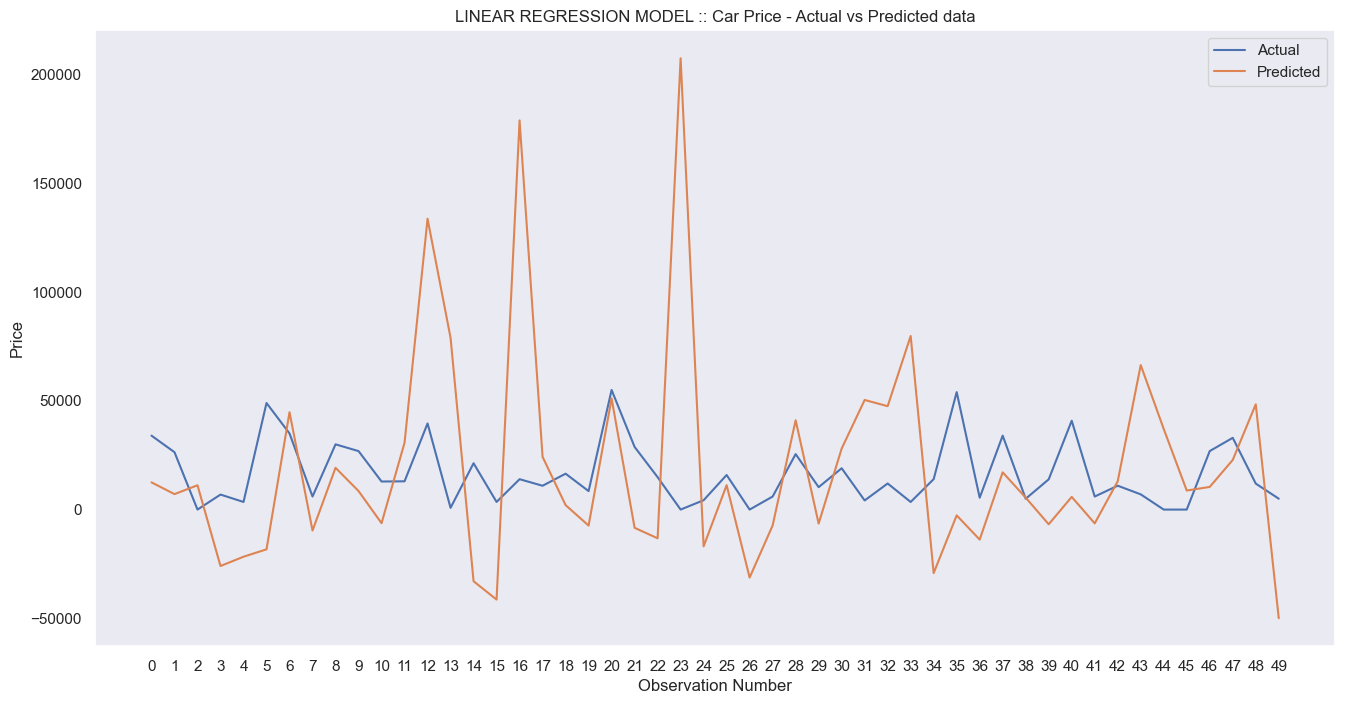

In [475]:
#plot the actual vs the predicted price
y_pred=(linear_regress_pipeline.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("LINEAR REGRESSION MODEL :: Car Price - Actual vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

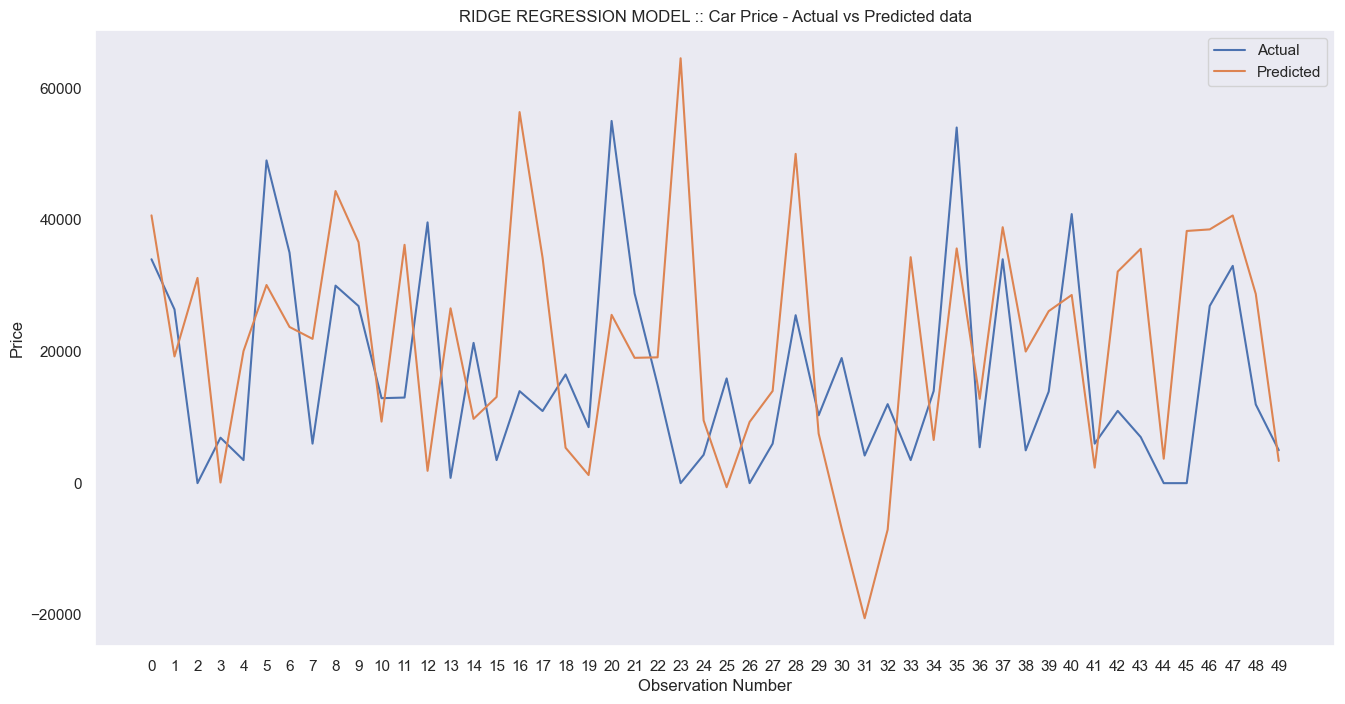

In [476]:
#plot the actual vs the predicted price
y_pred=(ridge_model.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("RIDGE REGRESSION MODEL :: Car Price - Actual vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

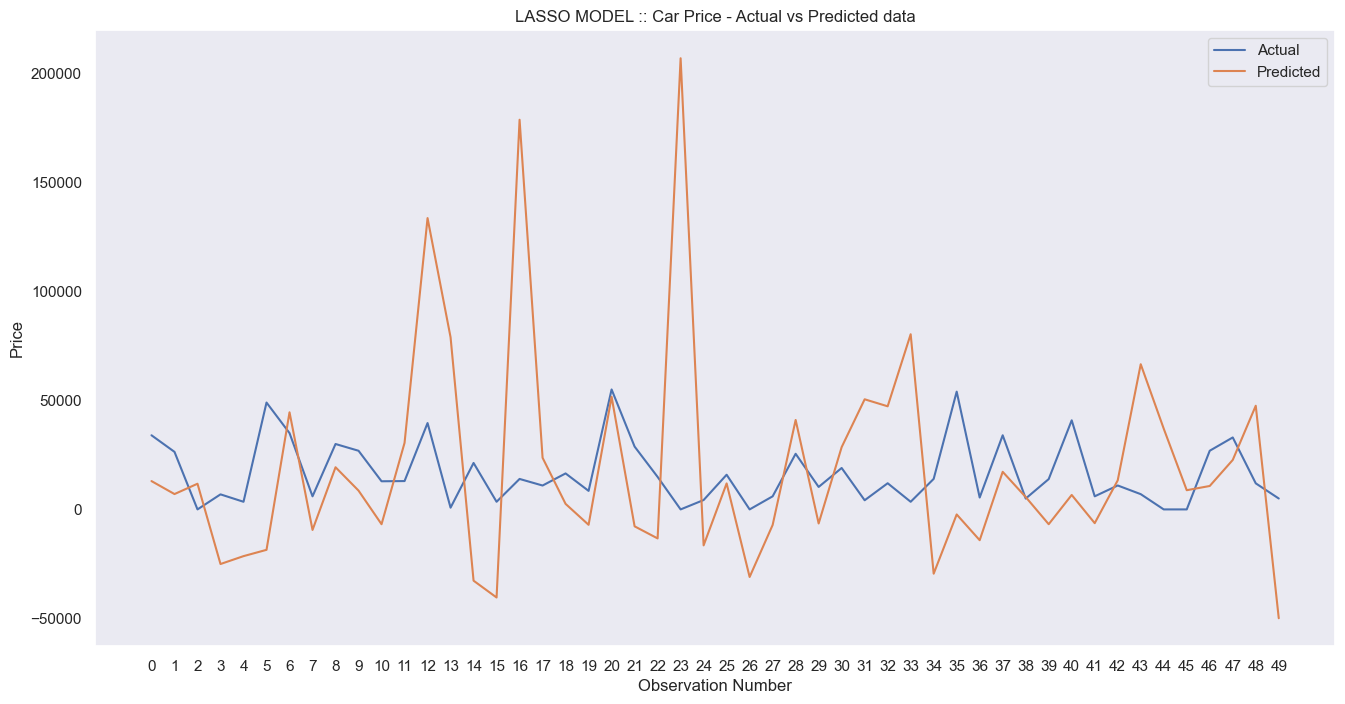

In [477]:
#plot the actual vs the predicted price
y_pred=(lasso_pipe.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("LASSO MODEL :: Car Price - Actual vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

# FINDINGS

Most used cars where found in CA, FL, NY, TX, OH and MI with average californa price around 14.8k
Ford, Chevolet, Toyota, Honda and Nissan have the maximum number of listings as they are majority sedan
Maximum number of vehicles are between 4 to 22 years old with majority sedan with automatic drive, fwd 
White, Black and Silver are the top colors with average white colored vehicle price around 17.2k and black colored around 16.2k
Pickup and trucks are selling for an average price of 23k, twice that of sedan
Vehicles less than 10k annual miles are mostly automatic and have clean title
Most of the vehicles are gas, except for truck which mostly use diesel



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.